In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(20,10)}, palette="GnBu_r")
import pandas_profiling

%matplotlib inline

In [17]:
#Importemos el archivo: supermarket_sales.csv

df = pd.read_csv(r"C:\Users\pablo\Documents\Data_Science\Data_sets\supermarket_sales.csv")

In [18]:
#Head del df

df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [4]:
#Veamos el shape

df.shape

(1000, 17)

In [5]:
#Totalidad de registros por columnas

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
#Tipo de dato de cada columna

df.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [7]:
#Principales medidas estadisticas

df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

In [9]:
#Data Profiling

profile = pandas_profiling.ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Ahora bien, a través del uso del Análisis Bivariado, trataremos de responder una serie de preguntas de negocio.

1. ¿Los ingresos brutos afectan las calificaciones que brindan los clientes?

Podemos usar el diagrama de dispersión para responder a esta pregunta.

<AxesSubplot:xlabel='gross income', ylabel='Rating'>

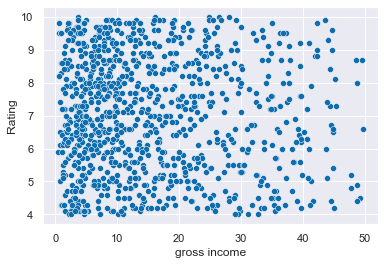

In [61]:
sns.scatterplot(y=df["Rating"], x=df["gross income"])

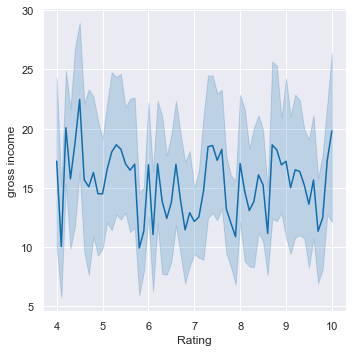

In [59]:
sns.relplot(x=df["Rating"], y=df["gross income"], kind="line")

**Respuesta**: El ingreso bruto no parece determinar la calificación

2. ¿Qué rama es la más rentable?

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

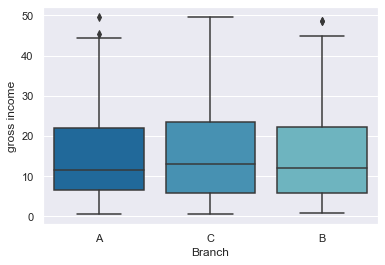

In [62]:
#Las variables a utilizar son: Branch y gross income
rentabilidad = sns.boxplot(data=df, x="Branch", y="gross income")
rentabilidad

<AxesSubplot:xlabel='Branch', ylabel='gross income'>

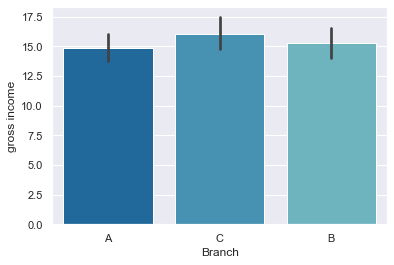

In [63]:
#Las variables a utilizar son: Branch y gross income
rentabilidad = sns.barplot(data=df, x="Branch", y="gross income")
rentabilidad

**Respuesta**: La rama C es la más rentable

3. ¿Existe alguna relación entre género e ingreso bruto?

De manera similar al análisis anterior, podemos usar un diagrama de caja para responder a esta pregunta.

<AxesSubplot:xlabel='Gender', ylabel='gross income'>

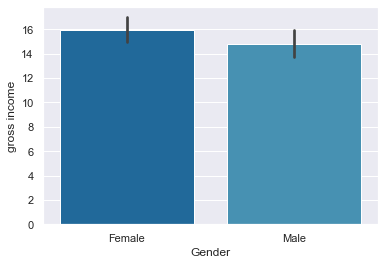

In [65]:
#Las variables a utilizar son: Gender y gross income
genero = sns.barplot(data=df, x="Gender", y="gross income")
genero

**Respuesta**: El ingreso bruto que viene de las mujeres es mayor

4. ¿Qué línea de productos genera más ingresos?

<AxesSubplot:xlabel='Product line', ylabel='gross income'>

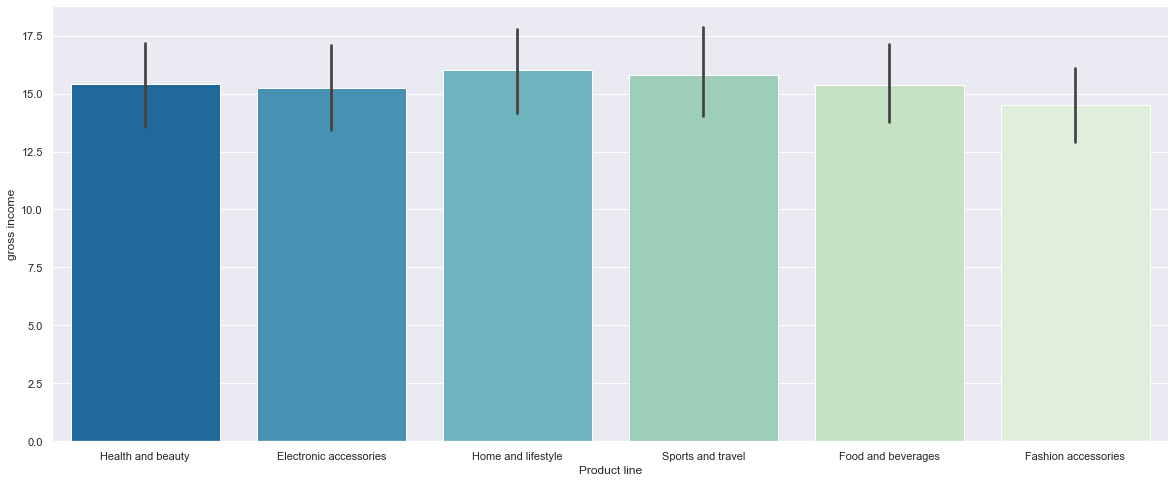

In [77]:
#Aclaración: Se deberá descomentar el código comentado para la realización del ejercicio.

cat = df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)

plt.figure(figsize=(20,8))

#Completar con un barplot de seaborn entre x='Product line' e y='gross income'

sns.barplot(data=df, x="Product line", y="gross income")

**Respuesta**: Los productos de home and lifestyle son los que más se venden